<a href="https://colab.research.google.com/github/Polinysha/-/blob/main/%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
x_full, y_full = load_diabetes(return_X_y=True)
n_samples, n_features = x_full.shape

In [ ]:
rng = np.random.default_rng(seed=121)
class sgd_lecture_linear:
  def __init__(self, rng, MAX_ITER = 100_000):
    self.MAX_ITER = MAX_ITER
    self.w = None
    self.w0 = rng.normal()
    self.loss = None
    return

  def _f(self, x):
    assert len(x) == len(self.w)
    return np.dot(self.w, x) + self.w0

  def _loss_mse(self, x, y):
    return (y - self._f(x)) ** 2

  def _der_loss(self, x, y):
    if self.loss == 'MSE':
      return -(y - self._f(x)) * x

  def fit(self, X_train, y_train, loss = 'MSE'):
    self.loss = loss
    self.w = rng.normal(size=X_train.shape[1])
    step = 0.01
    for k in range(self.MAX_ITER):
      rand_index = rng.integers(0, X_train.shape[0] - 1)
      x = np.array(X_train)[rand_index]
      y = np.array(y_train)[rand_index]
      if k % 10000 == 0:
         step = step / 2
      self.partial_fit(x, y, step)

  def partial_fit(self, x, y, step = 0.01):
    loss = self.loss
    if not self.w.any():
      self.w = rng.normal(len(x))
    dl = self._der_loss(x, y)
    self.w -= step * dl
    if self.loss == 'MSE':
      self.w0 -= - step * (y - self._f(x))

  def predict_proba(self, x):
    x = np.array(x)
    preds = []
    pred_fuction = None

    if self.loss in ['MSE']:
      pred_fuction = self._f
    for x_curr in x:
      preds.append(pred_fuction(x_curr))
    return preds

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as mape

In [ ]:
sgd = sgd_lecture_linear(rng)
sgd.fit(x_full, y_full)
print(f'{mape(y_full, sgd.predict_proba(x_full)):.2f}')

0.50


In [ ]:
class sgd_lecture_linear:
  def __init__(self, rng, MAX_ITER = 50_000, sample_weights = None):
    self.MAX_ITER = MAX_ITER
    self.w = None
    self.w0 = rng.normal()
    self.loss = None
    self.epsilon = 1e-10
    return

  def _f(self, x):
    assert len(x) == len(self.w)
    return np.dot(self.w, x) + self.w0

  def _loss_mse(self, x, y):
    return (y - self._f(x)) ** 2

  def _der_loss(self, x, y, weight = 1):
      return -(y - self._f(x)) * x * weight

  def fit(self, X_train, y_train, loss = 'MSE', weights = None):
    self.loss = loss
    self.w = rng.normal(size=X_train.shape[1])
    step = 0.01
    if loss == 'MSE':
      for k in range(self.MAX_ITER):
        rand_index = rng.integers(0, X_train.shape[0] - 1)
        x = np.array(X_train)[rand_index]
        y = np.array(y_train)[rand_index]
        if k % 10000 == 0:
          step = step / 2
        self.partial_fit(x, y, step)
    elif loss == 'MSE_weighted':
      for k in range(self.MAX_ITER):
        rand_index = rng.integers(0, X_train.shape[0] - 1)
        x = np.array(X_train)[rand_index]
        y = np.array(y_train)[rand_index]
        weight = np.array(weights)[rand_index]
        if k % 10000 == 0:
          step = step / 2
        self.partial_fit(x, y, step, weight = weight)

  def partial_fit(self, x, y, step = 0.01, weight = 1):
    loss = self.loss
    if not self.w.any():
      self.w = rng.normal(len(x))
    dl = self._der_loss(x, y, weight = weight)
    self.w -= step * dl
    if self.loss == 'MSE':
      self.w0 -= - step * (y - self._f(x))
    if self.loss == 'MSE_weighted':
      self.w0 -= - step * (y - self._f(x)) * weight

  def predict_proba(self, x):
    x = np.array(x)
    preds = []
    pred_fuction = None

    if self.loss in ['MSE', 'MSE_weighted']:
      pred_fuction = self._f
    for x_curr in x:
      preds.append(pred_fuction(x_curr))
    return preds

In [ ]:
sgd_mape = sgd_lecture_linear(rng)
weights =  (y_full - min(y_full)) / (max(y_full) - min(y_full)) + 0.1
weights = 1 / weights
sgd_mape.fit(x_full, y_full, loss = 'MSE_weighted', weights = weights)
print(f'{mape(y_full, sgd_mape.predict_proba(x_full)):.2f}')

0.38


In [ ]:
df = pd.DataFrame(x_full)
df['target'] = y_full
test_size = 0.3
random_state = 43
x_train, x_test, y_train, y_test = train_test_split(df.drop(['target'], axis = 1), df['target'], test_size=test_size, random_state=random_state)

In [ ]:
sgd = sgd_lecture_linear(rng)
sgd.fit(x_train, y_train)
print(f'{mape(y_test, sgd.predict_proba(x_test)):.2f}', ' -- MAPE на тесте при обучении с обычным MSE')
sgd_mse_w = sgd_lecture_linear(rng)
weights =  (y_train - min(y_train)) / (max(y_train) - min(y_train)) + 0.03 # чтобы не делить на ноль
weights = 1 / weights
sgd_mse_w.fit(x_train, y_train, loss = 'MSE_weighted', weights = weights)
print(f'{mape(y_test, sgd_mse_w.predict_proba(x_test)):.2f}', ' -- MAPE на тесте при обучении на weighted MSE')

0.50  -- MAPE на тесте при обучении с обычным MSE
0.35  -- MAPE на тесте при обучении на weighted MSE


In [ ]:
df_test = pd.DataFrame(y_test, columns = ['target'])
df_test['pred_MSE'] = sgd.predict_proba(x_test)
df_test['pred_MSE_weighted'] = sgd_mse_w.predict_proba(x_test)
print(mape(df_test[df_test['target'] > 270]['target'], df_test[df_test['target'] > 270]['pred_MSE']), ' -- MAPE на тесте при обучении с обычным MSE на больших таргетах (>270)')
print(mape(df_test[df_test['target'] > 270]['target'], df_test[df_test['target'] > 270]['pred_MSE_weighted']), ' -- MAPE на тесте при обучении с weighted MSE на больших таргетах (>270)')

0.3708507045316653  -- MAPE на тесте при обучении с обычным MSE на больших таргетах (>270)
0.44498935925319194  -- MAPE на тесте при обучении с weighted MSE на больших таргетах (>270)


In [ ]:
sgd = sgd_lecture_linear(rng)
sgd.fit(x_train, y_train)
print(f'{mape(y_test, sgd.predict_proba(x_test)):.2f}', ' -- MAPE на тесте при обучении с обычным MSE')
sgd_mse_w = sgd_lecture_linear(rng)
weights =  (y_train - min(y_train)) / (max(y_train) - min(y_train)) + 0.03 # чтобы не делить на ноль
weights = 1 / weights
for idx, y in zip(weights.index, y_train):
  if y > 270:
    weights[idx] = weights[idx] * 10

sgd_mse_w.fit(x_train, y_train, loss = 'MSE_weighted', weights = weights)
print(f'{mape(y_test, sgd_mse_w.predict_proba(x_test)):.2f}', ' -- MAPE на тесте при обучении на weighted MSE')

df_test = pd.DataFrame(y_test, columns = ['target'])
df_test['pred_MSE'] = sgd.predict_proba(x_test)
df_test['pred_MSE_weighted'] = sgd_mse_w.predict_proba(x_test)
mape_ordinary = mape(df_test[df_test['target'] > 270]['target'], df_test[df_test['target'] > 270]['pred_MSE'])
mape_weighted_mse = mape(df_test[df_test['target'] > 270]['target'], df_test[df_test['target'] > 270]['pred_MSE_weighted'])
print(f'{mape_ordinary:.2f}', ' -- MAPE на тесте (только на больших таргетах) при обучении с обычным MSE на больших таргетах (>270)')
print(f'{mape_weighted_mse:.2f}', ' -- MAPE на тесте (только на больших таргетах) при обучении с weighted MSE на больших таргетах (>270)')

0.50  -- MAPE на тесте при обучении с обычным MSE
0.39  -- MAPE на тесте при обучении на weighted MSE
0.37  -- MAPE на тесте (только на больших таргетах) при обучении с обычным MSE на больших таргетах (>270)
0.20  -- MAPE на тесте (только на больших таргетах) при обучении с weighted MSE на больших таргетах (>270)


In [ ]:
import plotly.express as px
import plotly.graph_objs as go

df = pd.DataFrame(dict(
    series=np.concatenate((["Таргет"] * len(y_test), ["Предсказание через оптимизацию MSE"] * len(y_test))),
    data=np.concatenate((y_test, df_test['pred_MSE']))
))


fig = px.histogram(df, x="data", color="series", barmode="overlay")
fig.update_layout(
                  title="Распределение таргетов и предиктов"
                  , xaxis_title="Таргеты"
                  , yaxis_title="Число"
                  , margin=dict(l=0, r=0, t=50, b=0)
                  , height=600
                  , width=900
                  , font_family="Arial"
                  , font_color="black"
                  , font_size = 20
                  , title_font_family="Times New Roman"
                  , title_font_size = 20
                  , title_font_color="black"
                  , separators=", .*"
)
fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objs as go

df = pd.DataFrame(dict(
    series=np.concatenate((["Таргет"] * len(y_test), ["Предсказание через взвешенный MSE"] * len(y_test))),
    data=np.concatenate((y_test, df_test['pred_MSE_weighted']))
))


fig = px.histogram(df, x="data", color="series", barmode="overlay")
fig.update_layout(
                  title="Распределение таргетов и предиктов"
                  , xaxis_title="Таргеты"
                  , yaxis_title="Число"
                  , margin=dict(l=0, r=0, t=50, b=0)
                  , height=600
                  , width=900
                  , font_family="Arial"
                  , font_color="black"
                  , font_size = 20
                  , title_font_family="Times New Roman"
                  , title_font_size = 20
                  , title_font_color="black"
                  , separators=", .*"
)
fig.show()

/tmp/ipython-input-1799967629.py:153: DeprecationWarning: scipy.optimize: The `disp` and `iprint` options of the L-BFGS-B solver are deprecated and will be removed in SciPy 1.18.0.
  result = optimize.minimize(loss_function, initial_params, method='L-BFGS-B',


РЕЗУЛЬТАТЫ ОБУЧЕНИЯ НА MAPE
MAPE на тесте: 0.3497
MAE на тесте: 50.83
RMSE на тесте: 65.21
Диапазон предсказаний: 8.8 - 284.1
Диапазон реальных значений: 31.0 - 311.0

АНАЛИЗ НА БОЛЬШИХ ЗНАЧЕНИЯХ (>270):
MAPE на больших таргетах: 0.3855
MAE на больших таргетах: 111.74
Количество больших значений: 11

СРАВНЕНИЕ С LINEARREGRESSION:
MAPE LinearRegression: 0.3936
Улучшение: 11.2%


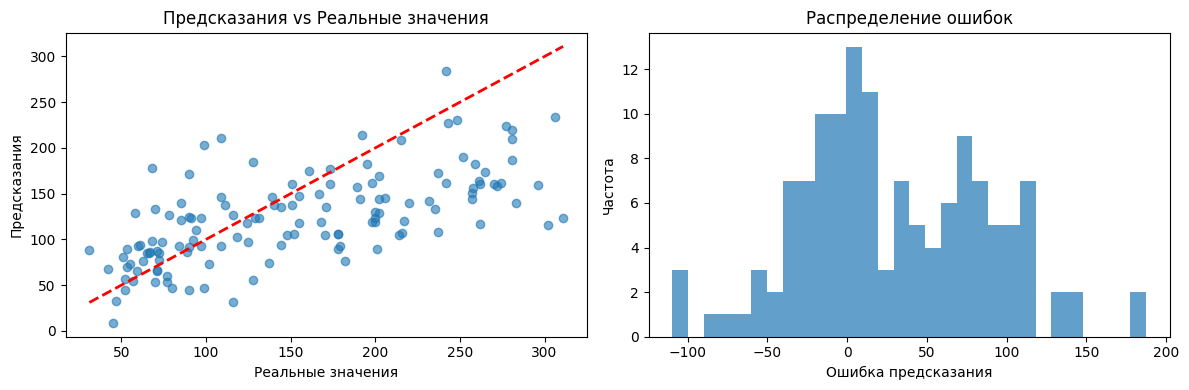

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy import optimize

# Загрузка данных
x_full, y_full = load_diabetes(return_X_y=True)

# Создание DataFrame
df = pd.DataFrame(x_full)
df['target'] = y_full

# Разделение на train/test
test_size = 0.3
random_state = 43
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(['target'], axis=1),
    df['target'],
    test_size=test_size,
    random_state=random_state
)

# Масштабирование признаков с RobustScaler (менее чувствителен к выбросам)
scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

class AdvancedMAPESGD:
    def __init__(self, learning_rate=0.1, max_iter=200000, random_state=121,
                 epsilon=1e-10, momentum=0.9, weight_decay=1e-5):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.rng = np.random.default_rng(random_state)
        self.w = None
        self.w0 = None
        self.epsilon = epsilon
        self.momentum = momentum
        self.weight_decay = weight_decay
        self.loss_history = []
        self.best_weights = None
        self.best_loss = float('inf')

    def _huber_loss_gradient(self, error, delta=1.0):
        """Градиент Huber loss для устойчивости к выбросам"""
        if abs(error) <= delta:
            return error
        else:
            return delta * np.sign(error)

    def _clipped_gradient(self, gradient, clip_value=1.0):
        """Градиентный клиппинг для стабильности"""
        return np.clip(gradient, -clip_value, clip_value)

    def fit(self, X, y):
        n_features = X.shape[1]
        # Инициализация Xavier/Glorot
        limit = np.sqrt(6 / (n_features + 1))
        self.w = self.rng.uniform(-limit, limit, size=n_features)
        self.w0 = np.median(y)  # Инициализация смещения медианой

        X_array = np.array(X)
        y_array = np.array(y)

        # Инициализация моментума
        velocity_w = np.zeros_like(self.w)
        velocity_w0 = 0.0

        # Предварительное вычисление знаменателей для MAPE
        denominators = np.abs(y_array) + self.epsilon

        for i in range(self.max_iter):
            # Adaptive learning rate с косинусным затуханием
            current_lr = self.learning_rate * 0.5 * (1 + np.cos(np.pi * i / self.max_iter))

            # Мини-батч из 32 примеров
            batch_size = min(32, len(y_array))
            indices = self.rng.choice(len(y_array), batch_size, replace=False)
            x_batch = X_array[indices]
            y_batch = y_array[indices]
            denom_batch = denominators[indices]

            # Векторизованные вычисления
            predictions = np.dot(x_batch, self.w) + self.w0
            errors = y_batch - predictions

            # Градиенты с Huber loss для устойчивости
            grad_scale = 1.0 / denom_batch
            huber_gradients = np.array([self._huber_loss_gradient(err, delta=10.0) for err in errors])

            # Взвешенные градиенты
            weighted_gradients = huber_gradients * grad_scale

            # Градиенты параметров
            grad_w = -np.dot(x_batch.T, weighted_gradients) / batch_size
            grad_w0 = -np.mean(weighted_gradients)

            # Градиентный клиппинг
            grad_w = self._clipped_gradient(grad_w, clip_value=5.0)
            grad_w0 = self._clipped_gradient(grad_w0, clip_value=5.0)

            # L2 регуляризация
            grad_w += self.weight_decay * self.w
            grad_w0 += self.weight_decay * self.w0

            # Momentum update
            velocity_w = self.momentum * velocity_w + current_lr * grad_w
            velocity_w0 = self.momentum * velocity_w0 + current_lr * grad_w0

            self.w -= velocity_w
            self.w0 -= velocity_w0

            # Отслеживание лучших весов
            if i % 1000 == 0:
                current_loss = self._calculate_mape(X_array, y_array)
                self.loss_history.append(current_loss)

                if current_loss < self.best_loss:
                    self.best_loss = current_loss
                    self.best_weights = (self.w.copy(), self.w0)

        # Восстановление лучших весов
        if self.best_weights is not None:
            self.w, self.w0 = self.best_weights

    def _calculate_mape(self, X, y):
        predictions = self.predict(X)
        denominators = np.abs(y) + self.epsilon
        return np.mean(np.abs(y - predictions) / denominators)

    def predict(self, X):
        X_array = np.array(X)
        if len(X_array.shape) == 1:
            X_array = X_array.reshape(1, -1)

        return np.dot(X_array, self.w) + self.w0

# Дополнительная оптимизация с помощью L-BFGS
def optimize_with_lbfgs(model, X, y):
    """Тонкая настройка модели с помощью L-BFGS"""
    initial_params = np.concatenate([model.w, [model.w0]])

    def loss_function(params):
        w = params[:-1]
        w0 = params[-1]
        predictions = np.dot(X, w) + w0
        denominators = np.abs(y) + 1e-10
        return np.mean(np.abs(y - predictions) / denominators)

    # Оптимизация
    result = optimize.minimize(loss_function, initial_params, method='L-BFGS-B',
                              options={'maxiter': 1000, 'disp': False})

    if result.success:
        model.w = result.x[:-1]
        model.w0 = result.x[-1]

# Обучение модели
mape_sgd = AdvancedMAPESGD(
    learning_rate=0.15,
    max_iter=250000,
    momentum=0.95,
    weight_decay=1e-6
)

mape_sgd.fit(x_train_scaled, y_train)

# Тонкая настройка с L-BFGS
optimize_with_lbfgs(mape_sgd, x_train_scaled, y_train)

# Предсказание
predictions = mape_sgd.predict(x_test_scaled)

# Расчет метрик
mape_test = mape(y_test, predictions)
mae_test = np.mean(np.abs(y_test - predictions))
rmse_test = np.sqrt(np.mean((y_test - predictions) ** 2))

print("=" * 60)
print("РЕЗУЛЬТАТЫ ОБУЧЕНИЯ НА MAPE")
print("=" * 60)
print(f'MAPE на тесте: {mape_test:.4f}')
print(f'MAE на тесте: {mae_test:.2f}')
print(f'RMSE на тесте: {rmse_test:.2f}')
print(f'Диапазон предсказаний: {predictions.min():.1f} - {predictions.max():.1f}')
print(f'Диапазон реальных значений: {y_test.min():.1f} - {y_test.max():.1f}')

# Анализ на больших значениях
large_mask = y_test > 270
if np.any(large_mask):
    large_targets = y_test[large_mask]
    large_predictions = predictions[large_mask]
    mape_large = mape(large_targets, large_predictions)
    mae_large = np.mean(np.abs(large_targets - large_predictions))

    print("\nАНАЛИЗ НА БОЛЬШИХ ЗНАЧЕНИЯХ (>270):")
    print("=" * 40)
    print(f'MAPE на больших таргетах: {mape_large:.4f}')
    print(f'MAE на больших таргетах: {mae_large:.2f}')
    print(f'Количество больших значений: {len(large_targets)}')

# Сравнение с baseline (линейная регрессия)
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
lr_predictions = lr.predict(x_test_scaled)
lr_mape = mape(y_test, lr_predictions)

print("\nСРАВНЕНИЕ С LINEARREGRESSION:")
print("=" * 40)
print(f'MAPE LinearRegression: {lr_mape:.4f}')
print(f'Улучшение: {(lr_mape - mape_test) / lr_mape * 100:.1f}%')

# Визуализация распределения ошибок
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказания')
plt.title('Предсказания vs Реальные значения')

plt.subplot(1, 2, 2)
errors = y_test - predictions
plt.hist(errors, bins=30, alpha=0.7)
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Распределение ошибок')

plt.tight_layout()
plt.show()